<img src="images/RIINBRE-Logo.jpg" width="400" height="400"><img src="images/MIC_Logo.png" width="600" height="600">

---

# Analysis of Biomedical Data for Biomarker Discovery
## Submodule 3: Introduction to Linear Models
### Dr. Christopher L. Hemme
### Director, [RI-INBRE Molecular Informatics Core](https://web.uri.edu/riinbre/mic/)
### The University of Rhode Island College of Pharmacy
Last Updated: March 17, 2023

---

## Introduction

At some point in high school algebra, you probably asked yourself "When am I ever going to have to use this?"  The answer is "Today."  What you learned in algebra - the equation of a line, solving systems of linear equations, etc. - were special cases of a broader field of mathematics called <b>linear algebra</b>.  In the real world, we rarely see the clean ideal data sets that we worked with in high school algebra.  Instead, we are often working with messy datasets that are influenced by many types of variability.  Even though the data is messy, it can often still be approximated by linear models, and these models form the basis of a wide range of analytical techniques in STEM fields.  Linear algebra is the study of linear equations and their representations in vector space.  This means that instead of the simple data sets we worked with in algebra, we're usually working with datasets represented as vectors and matrices, and the R programming language that we use for this learning module is designed specifically to work with these data structures (see <b>Submodule 6: Introduction to R Data Structures</b>).  Linear models are particularly important in biomedical and bioinformatics data analysis as they form the basis of linear regression, ANOVA, <i>t</i>-test, principle components analysis, and many other techniques that are commonly used in omics data analysis.

In this submodule we will cover basic vector and matrix operations, the generalized linear model and its applications, and common applications of the GLM (specifically linear and  logistic regression).  This will provide you the foundation for understanding the proteomics analyses covered in <b>Submodule 8 - Identification of IRI Biomarkers from Proteomics Data</b>.  For students interested in a career in bioinformatics, we strongly recommend taking a formal course in linear algebra which will cover these topics and more in much greater detail.  We also provide references at the end that users might find useful for further study.

<div class="alert alert-block alert-info">
<b>&#9995; Tip:</b> Blue boxes will indicate helpful tips.</div>

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> Used for interesting asides or notes.
</div>

<div class="alert alert-block alert-success">
<b>&#9997; Reference:</b> This box indicates a reference for an attached figure or table.
</div>

<div class="alert alert-block alert-danger">
<b>&#128721; Caution:</b> A red box indicates potential hazards or pitfalls you may encounter.
</div>

---

## Load R Modules

In [1]:
packages <- c("matlib", "pROC", "glm2")
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {install.packages(packages[!installed_packages])}

#matlib is a package for teaching linear algebra concepts
#glm2 is a package for fitting generalized linear models
#pROC is a package for plotting ROC curves

Installing packages into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’




In [2]:
require('tidyverse')
require('glm2')
require('pROC')
require('matlib')

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: glm2

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: matlib



---

## Vectors and Vector Operations

A vector is an ordered list of elements, by convention ordered vertically.  We can refer to a vector of length <i>n</i> as an <b><i>n</i>-vector</b>.

2-Vectors: $$a = \begin{bmatrix} 6 \\ 4\end{bmatrix}$$ $$b = \begin{bmatrix} 5 \\ 2\end{bmatrix}$$

A vector can be represented as a geometric object.  The above vector can be represented in two-dimensional Cartesian space as a line originating at the origin and ending at the point (6,4).  This means that the vector has both a direction and a magnitude (length).  The magnitude is calculated by:

$$\lvert\lvert x \rvert\rvert = \sqrt{x_1^2+x_2^2+...x_n^2}$$

$$\lvert\lvert a \rvert\rvert = \sqrt{a_1^2+a_2^2}$$
$$= \sqrt{6^2 + 4^2}$$
$$= \sqrt{52}$$
$$= 7.2$$

$$\lvert\lvert b \rvert\rvert = \sqrt{b_1^2+b_2^2}$$
$$= \sqrt{5^2 + 2^2}$$
$$= \sqrt{29}$$
$$= 5.3$$

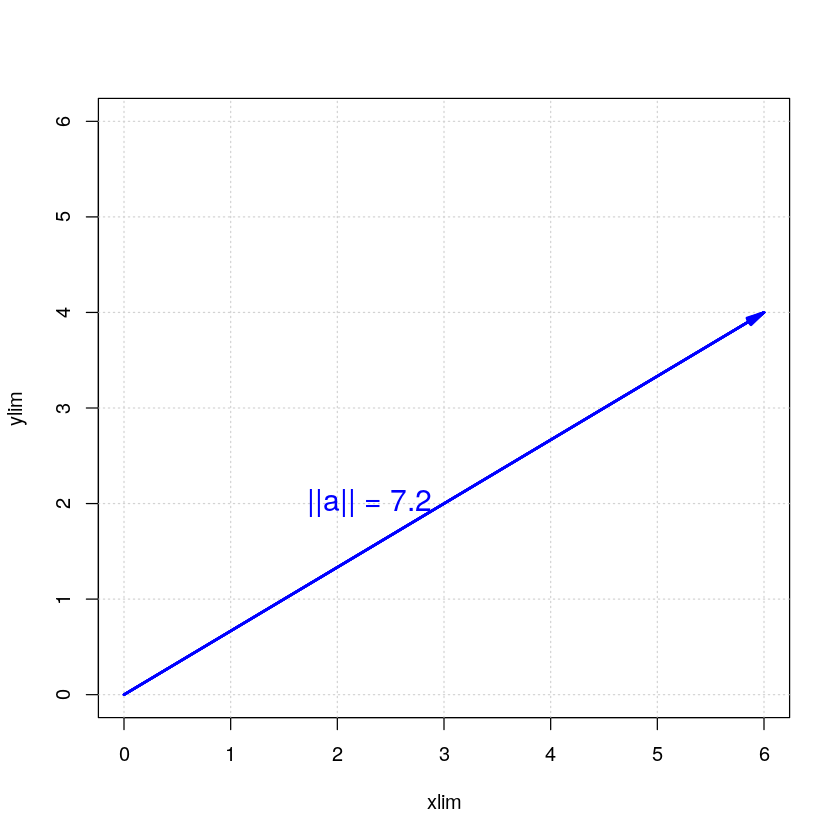

In [3]:
xlim <- c(0,6)
ylim <- c(0,6)
plot(xlim, ylim, type="n")
grid()
a=c(6,4)
vectors(a, labels="||a|| = 7.2", pos.lab=2, frac.lab=.5, col = "blue")

#This code uses base R and the matlib package for plotting a 2-vector in 2D space.  We first plot an empty 6x6 grid, then overlay the vector a = [6,4].

Vectors of the same size can be added together.

$$a = \begin{bmatrix} a_1 \\ a_2\end{bmatrix}, b = \begin{bmatrix} b_1 \\ 2_2\end{bmatrix}$$
$$a + b = \begin{bmatrix} a_1 + b_1 \\ a_2 + b_2\end{bmatrix}$$

$$a = \begin{bmatrix} 4 \\ 6\end{bmatrix} b = \begin{bmatrix} 5 \\ 2\end{bmatrix}$$
$$a + b = \begin{bmatrix} 9 \\ 8\end{bmatrix}$$

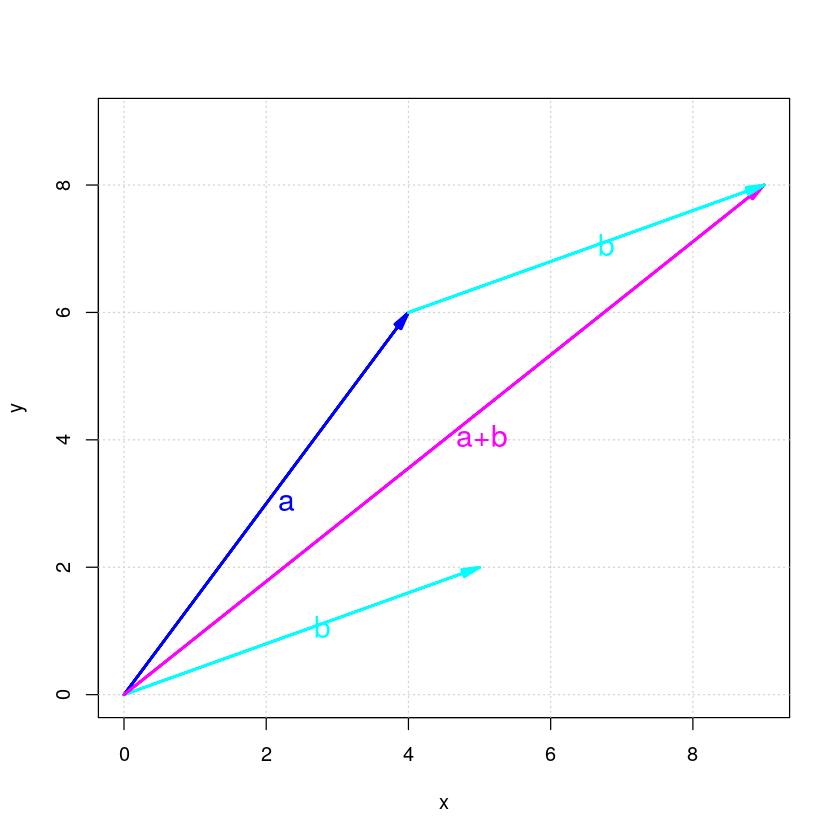

In [4]:
xlim <- c(0,9)
ylim <- c(0,9)
plot(xlim, ylim, type="n", xlab = "x", ylab = "y")
grid()
a <- c(4,6)
b <- c(5,2)
vectors(a, labels="a", pos.lab=4, frac.lab=.5, col = "blue")
vectors(b, labels="b", pos.lab=4, frac.lab=.5, col = "cyan")
vectors(a+b, labels="a+b", pos.lab=4, frac.lab=.5, col="magenta")
vectors(a+b, labels="b", pos.lab=4, frac.lab=.5, origin=a, col="cyan")

# We're now plotting vectors a, b, and a+b.  When we plot b alone, it starts from the origin.
# The last command plots b starting from the end of a to better show the additive effect of the two vectors

Finally, a vector can be multiplied by a scalar, that is, a constant value.

$$a = \begin{bmatrix} a_1 \\ a_2\end{bmatrix}$$
$$x * a = \begin{bmatrix} x * a_1 \\ x * a_2\end{bmatrix}$$

$$a = \begin{bmatrix} 4 \\ 6\end{bmatrix}$$
$$2 * a = \begin{bmatrix} 8 \\ 12\end{bmatrix}$$

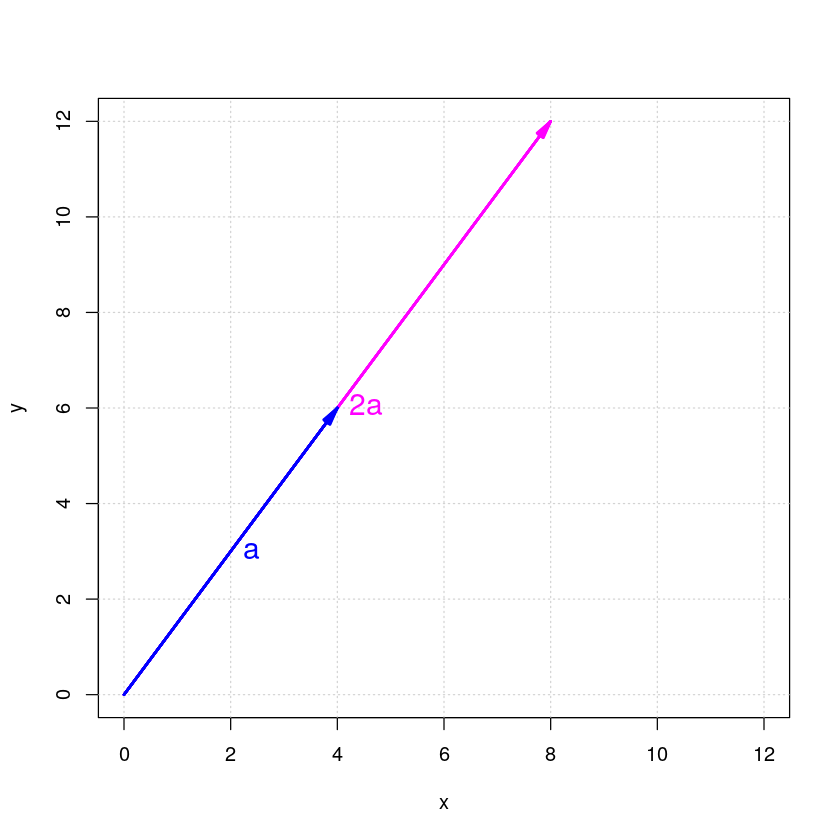

In [5]:
xlim <- c(0,12)
ylim <- c(0,12)
plot(xlim, ylim, type="n", xlab = "x", ylab = "y")
grid()
a <- c(4,6)
vectors(2*a, labels="2a", pos.lab=4, frac.lab=.5, col="magenta")
vectors(a, labels="a", pos.lab=4, frac.lab=.5, col = "blue")

# Using matlib to demonstrate the multiplicative effect of a scalar

A vector can be transposed, that is, flipped on its side.

$$a = \begin{bmatrix} a_1 \\ a_2\end{bmatrix}$$
$$a^T = \begin{bmatrix} a_1 & a_2\end{bmatrix}$$

$$a = \begin{bmatrix} 4 \\ 6\end{bmatrix}$$
$$a^T = \begin{bmatrix} 4 & 6\end{bmatrix}$$

We can now calculate one of the most important vector operations, the <b>inner product</b> (also called the <b>dot product</b>).

$$a = \begin{bmatrix} a_1 \\ a_2\end{bmatrix}$$
$$b = \begin{bmatrix} b_1 \\ b_2\end{bmatrix}$$
$$a \cdot b = ab^T = a_1 * b_1 + a_2 * b_2$$

$$a = \begin{bmatrix} 4 \\ 6\end{bmatrix}$$
$$b = \begin{bmatrix} 5 \\ 2\end{bmatrix}$$
$$a \cdot b= 4 * 5 + 6 * 2$$
$$a \cdot b= 20 + 12$$
$$a \cdot b= 32$$

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> Geometrically, the inner product is used to define the angle between two vectors by the equation:
    $$cos\;\theta = \frac{x \cdot y}{||x||\;||y||}$$
    In the above examples, the angle $\theta$ between <i>a</i> and <i>b</i> would be:
    $$\theta = arccos\frac{a \cdot b}{||a||\;||b||}$$
    $$\theta = arccos\frac{32}{7.2*5.3}$$
    $$\theta = 0.576\;radians = 33^\circ$$
</div>

The inner product is the weighted sum of the elements of the vectors.  Consider the follow example using simulated real estate data.  In which market can you expect to make the most profit?

<table>
<thead>
    <tr><th>Market</th><th>Units for Sale</th><th>Average Price (in $1000)</th></tr>
</thead>
<tbody>
    <tr><td>Texas</td><td>1000</td><td>750</td></tr>
    <tr><td>Ohio</td><td>2500</td><td>300</td></tr>
    <tr><td>Arizona</td><td>750</td><td>600</td></tr>
    <tr><td>Alaska</td><td>500</td><td>300</td></tr>
    <tr><td>Hawaii</td><td>250</td><td>1000</td></tr>
</tbody>
</table>

You might think based on units for sale that Ohio would be most valuable.  However, the Hawaii market has the highest average price.  The inner product of units and average price can tell us not only the total potential profit we can expect but also the relative contribution of each market to the total profit.

$$Units = \begin{bmatrix} 1000 \\ 2500 \\ 750 \\ 500 \\ 250\end{bmatrix} Price = \begin{bmatrix} 750 \\ 300 \\ 600 \\ 300 \\ 1000\end{bmatrix}$$
$$Potential Profit = Units \cdot Price^T= 1000 * 750 + 2500 * 300 + 750 * 600 + 500 * 300 + 250 * 1000$$
$$Potential Profit = 750000 + 750000 + 450000 + 150000 + 250000$$
$$Potential Profit = 2,350,000$$

Let's illustrate this calculation graphically using R.  We'll verify the result by calculating the inner product using the R <b>%*%</b> operator and then plot the results by market.

In [6]:
market <- c("Texas", "Ohio", "Arizona", "Alaska", "Hawaii")
units <- c(1000,2500,750,500,250)
price <- c(750,300,600,300,1000)
totalProfit <- units %*% price # %*% calculates the inner product of units and price
totalProfit

2350000


Creating a bar plot of the components of the inner product. We first create a data frame containing the market data and weighted profits. 

We then pipe marketProfit into ggplot using the __%>%__ operator. We set the x and y variables to Market and Profits, respectively. We use geom_bar to indicate a bar plot and rename the y axis. Finally, we set the theme to black and white and change the font sizes

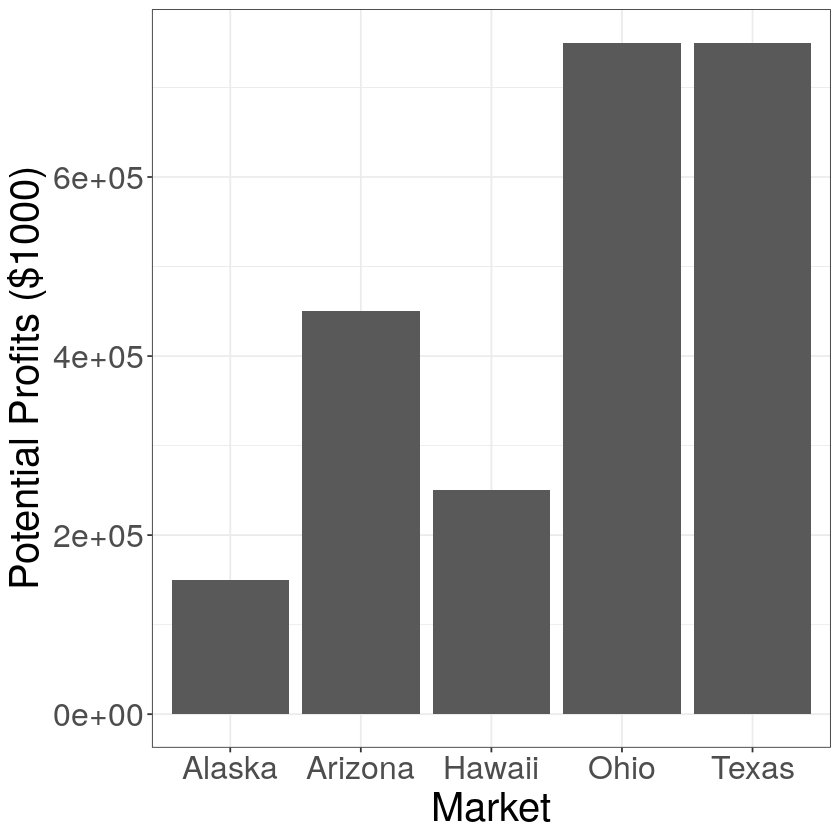

In [7]:
marketProfit <- data.frame(
    Market = market,
    Profits = c(750000, 750000, 450000, 150000, 250000)
)
marketProfit %>%
    ggplot(aes(x = Market, y = Profits)) +
        geom_bar(stat = "identity") +
        ylab("Potential Profits ($1000)") +
        theme_bw() +
        theme(text=element_text(size = 24))

The Texas market is highly profitable because of the high average price, but the Ohio market is equally valuable because it has more units to sell.  The Hawaii market is not as valuable as we thought because of the low number of units available for sale.  We can think of this as the unit data weighted by average housing prices (or vice versa).  Of course, in a real market, you would expect other factors to be important as well, such as market demand.  Fortunately, there is a way to account for these additional factors... but we're getting ahead of ourselves.  Let's talk about matrices first.

---

## Matrices and Matrix Operations

A matrix is a two-dimensional array with dimensions <i>m</i> x <i>n</i>, with <i>m</i> being the number of rows and <i>n</i> being the number of columns.  If <i>m</i> = <i>n</i>, then we have a <b>square matrix</b>.  If the left-to-right diagonal values of a square matrix are 1's and all other values are 0, we have an <b>identity matrix</b>.

3x5 Matrix: $$\begin{bmatrix}1 & 4 & 7 & 2 & 6 \\ 2 & 7 & 2 & 2 & 8 \\ 4 & 9 & 7 & 7 & 1 \end{bmatrix}$$
4x4 Square Matrix: $$\begin{bmatrix} 6 & 4 & 3 & 7 \\ 2 & 1 & 1 & 4 \\ 9 & 1 & 3 & 8 \\ 6 & 3 & 2 & 1 \end{bmatrix}$$ 
4x4 Identity Matrix: $$\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$$ 

A <b>sparse matrix</b> is a matrix which a significant number of the elements are 0.  Omics data sets often produce sparse matrices.

Transposing an <i>m</i> x <i>n</i> matrix results in an <i>n</i> x <i>m</i> matrix in which the matrix is "flipped" on its side.

$$A = \begin{bmatrix}1 & 4 & 7 & 2 & 6 \\ 2 & 7 & 2 & 2 & 8 \\ 4 & 9 & 7 & 7 & 1 \end{bmatrix}$$

$$A^T = \begin{bmatrix}1 & 2 & 4 \\ 4 & 7 & 9 \\ 7 & 2 & 7 \\ 2 & 2 & 7 \\ 6 & 8 & 1 \end{bmatrix}$$

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> By convention, we use lower case letters to denote a vector and upper case letters to denote a matrix.  The rows of an <i>m</i> x <i>n</i> matrix are <i>n</i>-vectors (<b>row vectors</b>) and the columns are <i>m</i>-vectors (<b>column vectors</b>).
</div>

Matrices of the same size can be added together and a matrix can be multiplied by a scalar value.

$$A = \begin{bmatrix}1 & 4 & 7 & 2 & 6 \\ 2 & 7 & 2 & 2 & 8 \\ 4 & 9 & 7 & 7 & 1 \end{bmatrix}B = \begin{bmatrix}4 & 6 & 4 & 1 & 0 \\ 0 & 1 & 0 & 3 & 1 \\ 2 & 5 & 3 & 4 & 1 \end{bmatrix}$$

$$A + B = \begin{bmatrix}5 & 10 & 11 & 3 & 6 \\ 2 & 8 & 2 & 5 & 9 \\ 6 & 14 & 10 & 11 & 2 \end{bmatrix}$$

$$2 * A = \begin{bmatrix}2 & 8 & 14 & 4 & 12 \\ 4 & 14 & 4 & 4 & 16 \\ 8 & 18 & 14 & 14 & 2 \end{bmatrix}$$

An <i>m</i> x <i>n</i> matrix can be multiplied by an <i>n</i>-vector resulting in an <i>m</i>-vector.

$$A = \begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn}\end{bmatrix} x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$$

$$y = A * x = \begin{bmatrix} x_1 * a_{11} + x_2 * a_{12} + \cdots + x_n * a_{1m} \\ x_1 * a_{21} + x_2 * a_{22} + \cdots + x_n * a_{2n} \\ \vdots \\ x_1 * a_{m1} + x_2 * a_{m2} + \cdots + x_m * a_{mn} \end{bmatrix}$$

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> Each element of the vector y is the inner product of the corresponding row vector from A and x.
</div>

Finally, matrices can be multiplied by each other if they are compatible.  An <i>m</i> x <i>p</i> matrix multiplied by an <i>p</i> x <i>n</i> matrix results in an <i>m</i> x <i>n</i> matrix as follows:

$$A = \begin{bmatrix}a_{11} & a_{12} & \cdots & a_{1p} \\ a_{21} & a_{22} & \cdots & a_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mp}\end{bmatrix} B = \begin{bmatrix}b_{11} & b_{12} & \cdots & b_{1n} \\ b_{21} & b_{22} & \cdots & b_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ b_{p1} & b_{p2} & \cdots & b_{pn}\end{bmatrix}$$

$$A * B = \begin{bmatrix} a_{11} * b_{11} + a_{12} * b_{21} + \cdots + a_{1p} * b_{p1} & a_{11} * b_{21} + a_{12} * b_{22} + \cdots + a_{1p} * b_{p2} & \cdots & a_{11} * b_{1n} + a_{12} * b_{2n} + \cdots + a_{1p} * b_{pn} \\ a_{21} * b_{11} + a_{22} * b_{21} + \cdots + a_{2p} * b_{p1} & a_{21} * b_{21} + a_{22} * b_{22} + \cdots + a_{2p} * b_{p2} & \cdots & a_{21} * b_{1n} + a_{22} * b_{2n} + \cdots + a_{2p} * b_{pn} \\ \cdots & \cdots & \ddots & \vdots \\ a_{m1} * b_{1n} + a_{m2} * b_{2n} + \cdots + a_{mp} * b_{pn} & a_{m1} * b_{2n} + a_{m2} * b_{2n} + \cdots + a_{mp} * b_{pn} & \cdots & a_{m1} * b_{1n} + a_{m2} * b_{2n} + \cdots + a_{mp} * b_{pn} \\ \end{bmatrix}$$


$$A = \begin{bmatrix}1 & 4 & 7 & 2 & 6 \\ 2 & 7 & 2 & 2 & 8 \\ 4 & 9 & 7 & 7 & 1 \end{bmatrix} B = \begin{bmatrix}0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 & 0 \end{bmatrix}$$

$$A * B = \begin{bmatrix} 6 & 2 & 7 & 4 & 1\\ 8 & 2 & 2 & 7 & 2 \\ 1 & 7 & 7 & 9 & 4\end{bmatrix}$$

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> Each element of the matrix A * B is the inner product of the corresponding row vector from A and column vector from B.
</div>

<div class="alert alert-block alert-info">
<b>&#9995; Tip:</b> Did you see what we did there with B?</div>

---

## Principles of Linear Models

If you think back to high school algebra, you might remember the standard equation of a line.

$$y = bx + a$$

In this equation, y is the <b>dependent variable</b> (also called the <b>response variable</b>) and x is the <b>independent variable</b> (also called the <b>explanatory variable</b>  or <b>covariate</b>).  In other words, the value of y depends on the vale of x.  In practical terms, x would usually be a measurement of some kind with y calculated from that measurement.  If we were to plot x vs y, the value a would be the <b>intercept</b> (i.e. the value of y when x = 0) and b is the <b>slope</b> (i.e. the change in y associated with a one unit change in x).  Let's plot some real data.

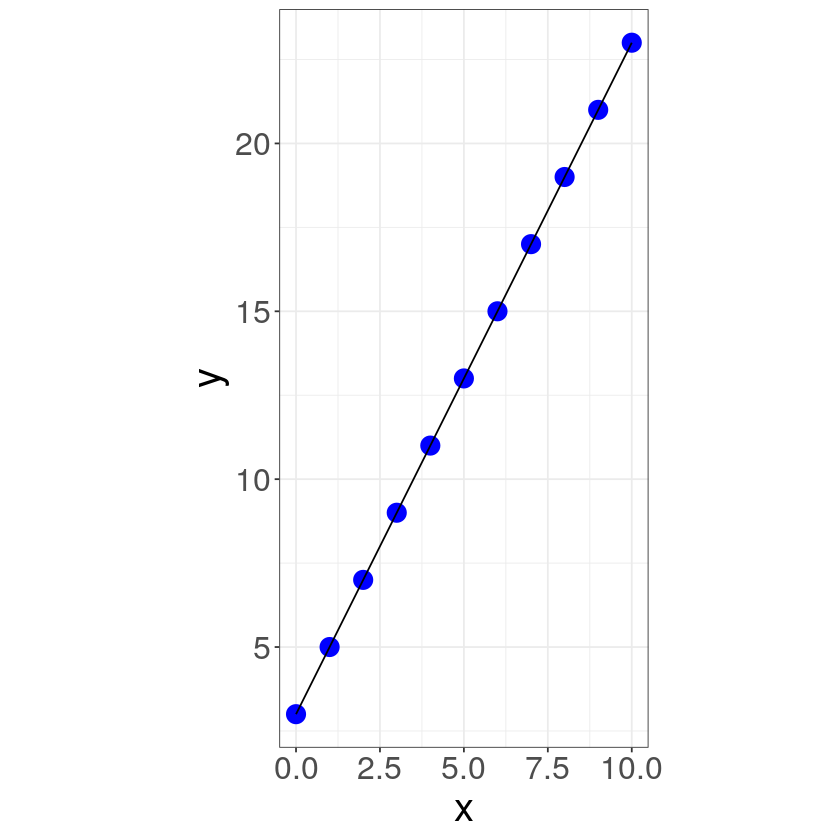

In [8]:
x <- 0:10
y <- 2 * x + 3
data.frame(x = x, y = y) %>%
    ggplot(aes(x = x, y = y)) + # sets basic scatter plot parameters
        geom_point(size = 5, color = "blue") + # plots points
        geom_line() + # plots line
        coord_fixed() + # sets axis to equal units
        theme_bw() + # sets theme to black and white
        theme(text=element_text(size = 24)) # increase font size

# similar to the code above, expect we're plotting both points (geom_point) and a line (geom_line) on the same graph.
# we fix the coordinates so that the axes are equally spaced

The line intersects the y axis at y = 3, and y increase by 2 units for every one unit increase in x.

When dealing with multiple independent variables, we often write linear equations in the following form:

$$ax + by + cz = d$$

In this form, x, y and z are the dependent variables and a, b, and c are the coefficients of each variable (d is a constant).  We call this form a <b>linear combination</b>.  You might recognize this form from algebra because this is the form we use when solving for systems of linear equations.

$$ 3x - y + z = 7$$
$$ x + 2y -2z = -7$$
$$ x + y + z = 3$$
$$ x = ? \; y = ? \;z = ?$$

A property of linear equations is that we can transform them into other linear equations by multiplying them by a scalar value, adding values to both sides of the equation, or by combining two equations.  In this way, we can isolate the individual variables and, if a unique solution exists, find the values.  See if you can solve the above equations and then use the following R code to check your answers.

In [9]:
A <- rbind(c(3,-1,1), c(1,2,-2), c(1,1,1))
# We weave the three vactors together into a matrix using rbind (i.e. row bind) (cbind would bind by column)
B <- c(7,-7,3)
# Solve requires a matrix of coefficients and a vector of constants, so we make A and B separate
solve(A,B)
# Solve solves the system of linear equations

[1]  1 -1  3

You might notice from the R code that we're inputting the data as a matrix (via <b>rbind</b>) and a vector before sending it to <b>solve</b>.  The matrix notation is very useful for understanding what's happening.

$$\begin{bmatrix}3 & -1 & 1 & 7\\ 1 & 2 & -2 & -7\\ 7 & -7 & 3 & 3\end{bmatrix}$$

Each row of the matrix represents one of our equations.  The first three columns represent each of our variables, and the fourth column represents our constants.  Using the same rules for transforming linear equations as before, we can rewrite the matrix like this:

$$\begin{bmatrix}1 & 0 & 0 & 1\\ 0 & 1 & 0 & -1\\ 0 & 0 & 1 & 3\end{bmatrix}$$

Each of our first three columns are now unit vectors isolating an individual variable.  The fourth column provides the solution to those variables.

---

## The Generalized Linear Model

When studying these concepts in algebra, we often focus on idealized examples that provide unique solutions.  For example, to find an exact solution for a system of linear equations, we need a number of equations equal to the number of variables.  In practice, we rarely have such clean data sets.  Measured data points rarely fall on a straight line and instead include a great deal of experimental and random noise.  In solving systems of linear equations, it's very common to have more variables than equations necessary to solve them.  In these cases, we have to approximate solutions using <b>linear models</b>.  A linear model describes one or more independent variables as a linear combination of independent variables.  We'll keep things simple in this submodule and assume a single independent variable.

The Generalized Linear Model (GLM) is a statistical framework for describing a variety of common models including linear regression, analysis of variance (ANOVA), the <i>t</i>-test, logistic regression, linear mixed models, and many more.  The different models under the umbrella of the GLM are defined by three attributes:

- The probability distribution function of the response variable <i><b>$Y$</b></i>
- The linear predictor <i><b>$\eta = X\beta$</b></i>
- The <b>link function</b> relating $\eta$ to the mean $\mu$ of the distribution function

For the (unfortunately named) <b>general linear model</b> that includes linear regression, ANOVA and <i>t</i>-test, the link function is <i><b>$\mu = X\beta$</i></b> and we assume normal distribution of Y which gives us the general form:

$$Y = XB + U$$

where

Y = Matrix of dependent variables with rows as features and columns as samples (often called a <b>count matrix</b>)<br>
X = Matrix of independent variables (called a <b>design matrix</b> when using categorical data)<br>
B = Estimated coefficients<br>
U = Matrix of errors

<img src="images/GLM.png" width="600" height="600">

---

## Linear Regression

<b>Linear regression</b>, <b>Analysis of Variance (ANOVA)</b> and <b><i>t</i>-test</b> are all special cases of the general linear model.

- Linear regression models the relationship between one dependent variables and one or more independent variables.  <b>Simple linear regression</b> is the case for one independent variable, <b>multiple linear regression</b> for multiple dependent variables.  The dependent variable in a continuous variable the the independent variable is either continuous or categorical.

- ANOVA is a special case of linear regression where the independent variable is categorical representing two or more populations.  ANOVA is designed to determine if the means of the populations significantly differ.

- <i>t</i>-test is the special case of ANOVA with only two populations.

<div class="alert alert-block alert-warning">
    <b>&#127891; Note:</b> <b>Multivariate linear regression</b> is the model used when considering multiple dependent variables.
</div>

<img src="images/Regression-ANOVA-ttest.png" width="600" height="600">

The rationale behind regression models is as follows.  Consider a dataset modeled with two variables.  

<img src="images/Regression 1.png" width="400" height="400">

We can see from the scatterplot that the data points roughly follow a line.  However, they do not exactly fit a line because of the introduction of noise.  The source of the noise could be some property of the data or it could just be random variability.  We can pick any arbitrary line to fit the data, but how do we know which line is best?

<img src="images/Regression 2.png" width="400" height="400">

Let's start by looking at our regression model.

$$y = X_i^T\beta + \epsilon$$

where

$$y = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_i\end{bmatrix}$$

$$X = \begin{bmatrix}x_1^T \\ x_2^T \\ \vdots \\ x_p^T\end{bmatrix} = \begin{bmatrix}x_11 & x _12 & \cdots & x_1p \\ x_21 & x _22 & \cdots & x_2p \\ \vdots & \vdots & \ddots & \vdots \\ x_n1 & x _n2 & \cdots & x_np \\\end{bmatrix}$$

$$\beta = \begin{bmatrix}\beta_1 \\ \beta_2 \\ \vdots \\ \beta_p\end{bmatrix}$$

$$\epsilon = \begin{bmatrix}\epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_i\end{bmatrix}$$

Let's look at the terms in detail.  __y__ is our dependent variable.  In omics, this is typically a count matrix of features (rows) and samples (columns), with the features being genes, transcripts, proteins, or whatever your particular omics experiment is measuring.  __X__ is the matrix (also called the <b>design matrix</b>) of our independent variables (we'll call them covariates from this point forward) with each column vector representing one of our covariates.  For categorical covariates, these values are replaced with dummy variables (0 or 1).  We'll look at the design matrix in more detail below.  $\beta$ is the matrix of our coefficients that are calculated for each covariate.  $\epsilon$ is the matrix of our errors.  

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> If you think the term $y = X_i^T\beta$ looks like an inner product, you're right.
</div>

Now we need a way to evaluate how well a given line fits our data.  We do this using the <b>method of least squares</b>.

<img src="images/Regression 3.png" width="400" height="400">

For each data point, we calculate the y-axis offset from the predicted line, square the results (to remove negative values), and then add them together to get the <b>sum of squares</b>.  The line that gives us the minimal sum of squares is our best fit line and ultimately our values of $\beta$.

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> Without going into the math, our regression model provides a function that allows us to do this calculation easily.  Basically, we're looking for the case where the derivative of that function equals 0, and from that function we calculate our values of $\beta$.
</div>

---

## The Design Matrix

Let's consider the following experiment that has one covariate with four levels.

$$
\begin{aligned}
& \text {Experiment 1. Single treatment vs. control, sham and placebo }\\
&\begin{array}{cccc}
\hline \hline \text { Subject } & \text { Treatment State } \\
\hline 1 & Control \\
2 & Control \\
3 & Sham \\
4 & Sham \\
5 & Placebo \\
6 & Placebo \\
7 & Treatment \\
8 & Treatment \\
\hline
\end{array}
\end{aligned}
$$

Our model will look like this:

$$y = \beta_0 + \beta_1 x_{Sham} + \beta_2 x_{Placebo} + \beta_3 x_{Treatment} + \epsilon$$

Since we can't put the category names into our regression model, we replace them with dummy variables of 0's and 1's and our design matrix looks like this:

$$X = \begin{bmatrix}1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 \\ 1 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 0 & 0 & 1 \\ 1 & 0 & 0 & 1 \end{bmatrix}$$

The four columns represent our four covariates in the order shown above.  The first column (Control) is set as the intercept and is all 1's.  If you look across the first row (representing our first sample), this model says "Calculate $\beta$ for Sham holding Placebo and Treatment constant".  When we run this model, we calculate our four $\beta$'s.  $\beta_0$ represents the <b>group mean</b> for the control samples.  The other $\beta$'s are the offset for that covariate from the mean of Control.  So the group mean of Treatment would be $\beta_0 + \beta_3$.

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> You might sometimes see $\beta_0$ called $\mu$ and the other $\beta$'s as $\tau$.
</div>

A more common model used in omics data analysis (and in ANOVA) is the <b>cell means model</b>.  In this case, we set the intercept to zero and each $\beta$ is the group mean of the respective covariate.  The design matrix in this case would look like this:

$$X = \begin{bmatrix}1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 1 \end{bmatrix}$$

---

## Example

R has many built-in datasets that are useful for testing functions.  Let's look at the classic <b>iris</b> dataset.  This dataset classifies different species of iris based on four cofactors, Sepal Length, Sepal Width, Petal Length and Petal Width.

In [10]:
iris #iris is a built-in R data set and can be called from anywhere using the iris function
summary(iris) # calculates basic summary statistics (counts, mean, median, etc.)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

`geom_smooth()` using formula = 'y ~ x'


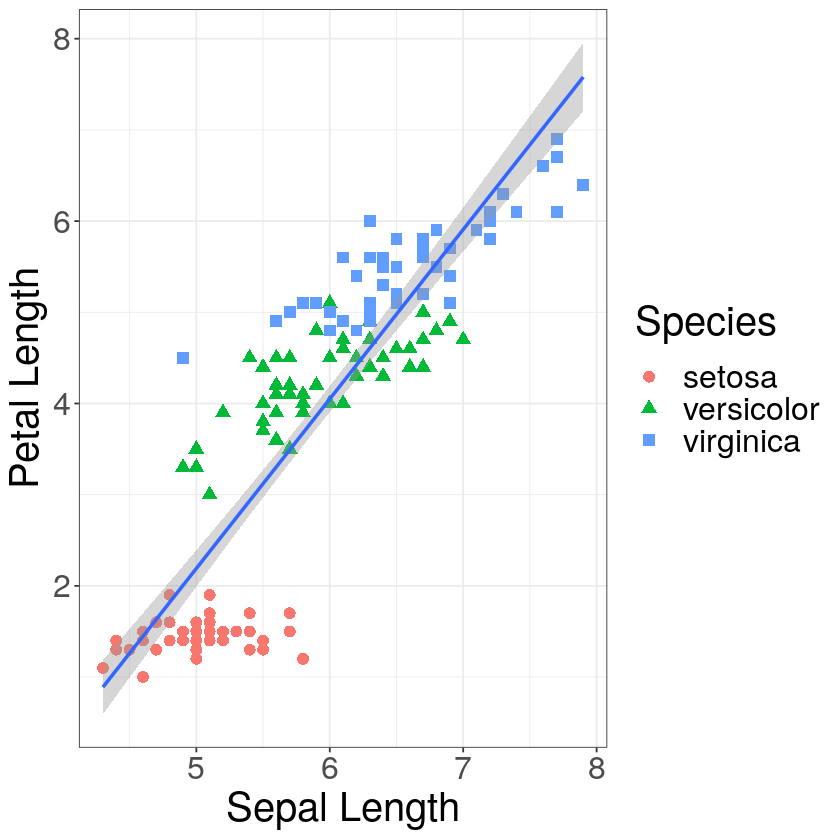

In [11]:
iris_scatter <- iris %>%
    ggplot(aes(x = Sepal.Length, y = Petal.Length)) +
        geom_point(size = 3, aes(color = Species, shape = Species)) +
        xlab("Sepal Length") +
        ylab("Petal Length") +
        theme_bw() +
        theme(text=element_text(size = 24))

# basic scatter plot (geom_point) that sets the colors and shape of the data points by Species

iris_scatter + geom_smooth(method="lm")

# adds trend line (geom_smooth) based on linear regression (method="lm") using the default formula y ~ x

We're going to run a simple regression model comparing Petal Length to Sepal Length, both of which are continuous variables. We'll use the <b>lm</b> function of R which is used for basic linear regression models.  __lm__ takes a formula of the form <i>Response Variable ~ Covariates</i>.  The <b>data</b> argument indicates that __lm__ should look for the Petal.Length and Sepal.Length columns in iris.

In [12]:
fit1 <- lm(Petal.Length ~ Sepal.Length, data = iris)
summary(fit1)

# lm carries out basic linear regression using a formula (e.g. Petal.Length ~ Sepal.Length)
# The formula is of the form y ~ x, where y is the response variable and x is the covariate
# summary summarizes the regression data


Call:
lm(formula = Petal.Length ~ Sepal.Length, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.47747 -0.59072 -0.00668  0.60484  2.49512 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.10144    0.50666  -14.02   <2e-16 ***
Sepal.Length  1.85843    0.08586   21.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8678 on 148 degrees of freedom
Multiple R-squared:   0.76,	Adjusted R-squared:  0.7583 
F-statistic: 468.6 on 1 and 148 DF,  p-value: < 2.2e-16


The coefficient returned for Sepal.Length suggests that for every 1 unit increase in Sepal.Length, there is a 1.858 increase in Petal.Length.  This is consistent with what we see in the scatterplot.  However, we can also see from the scatterplot that the relationship between the two variables differs between species.  versicolor and virginia show strong positive trends, but setosa does not.  We can also see this with the <b>Adjusted R-squared</b> value (0.76) which gives us an indication of the strength of the correlation between the two variables (1.0 being perfect correlation).  Let's extend our model to include species.

`geom_smooth()` using formula = 'y ~ x'


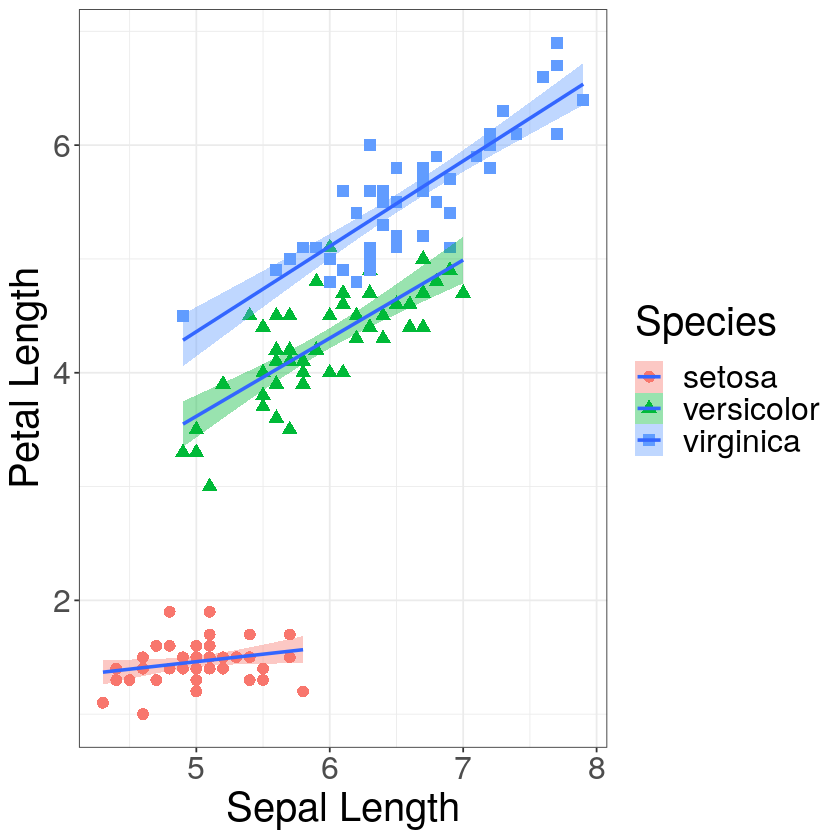

In [13]:
iris_scatter <- iris %>%
    ggplot(aes(x = Sepal.Length, y = Petal.Length)) +
        geom_point(size = 3, aes(color = Species, shape = Species)) +
        xlab("Sepal Length") +
        ylab("Petal Length") +
        geom_smooth(method="lm", aes(fill=Species)) +
        theme_bw() +
        theme(text=element_text(size = 24))
iris_scatter

# We modify geom_smooth with an aesthetic (aes(fill=Species)) to fit each Species separately

In [14]:
fit2 <- lm(Petal.Length ~ Sepal.Length + Species, data = iris)
summary(fit2)

# We modify the formula to the form y ~ x1 + x2 to indicate the second covariate assuming no interaction effects


Call:
lm(formula = Petal.Length ~ Sepal.Length + Species, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76390 -0.17875  0.00716  0.17461  0.79954 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.70234    0.23013  -7.397 1.01e-11 ***
Sepal.Length       0.63211    0.04527  13.962  < 2e-16 ***
Speciesversicolor  2.21014    0.07047  31.362  < 2e-16 ***
Speciesvirginica   3.09000    0.09123  33.870  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2826 on 146 degrees of freedom
Multiple R-squared:  0.9749,	Adjusted R-squared:  0.9744 
F-statistic:  1890 on 3 and 146 DF,  p-value: < 2.2e-16


We've added the categorical variable <b>Species</b> to our model and now the coefficient has been split into coefficients describing the effects of Sepal.Length and Species.  How do we interpret this model?  The Sepal.Length coefficient says that for every 1 unit increase in Sepal.Length, Petal.Length increases by 0.63 ignoring species.  For species, versicolor and virginica show a 2.2 and 3.1 increase (respectively), compared to setosa assuming Sepal.Length is held constant.  The Adjusted R-squared of our model has improved to 0.97.

In [15]:
fit3 <- lm(Petal.Length ~ 0 + Sepal.Length + Species, data = iris)
summary(fit3)

# Modifying the formula to the form y ~ 0 + x1 + x2 forces the intercept through the origin


Call:
lm(formula = Petal.Length ~ 0 + Sepal.Length + Species, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76390 -0.17875  0.00716  0.17461  0.79954 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
Sepal.Length       0.63211    0.04527  13.962  < 2e-16 ***
Speciessetosa     -1.70234    0.23013  -7.397 1.01e-11 ***
Speciesversicolor  0.50780    0.27169   1.869   0.0636 .  
Speciesvirginica   1.38766    0.30092   4.611 8.67e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2826 on 146 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9954 
F-statistic:  8050 on 4 and 146 DF,  p-value: < 2.2e-16


---

## Logistic Regression

There are circumstances where linear models do not fit the data well.  Consider a case where we have a binary variable such as Control vs. Treatment, True vs. False, Healthy vs. Disease, etc.  Such variables can be thought of as <b>binary classification schemes</b>.  In other words, can we accurately classify data into correct category?  If we try to fit a straight line to this data, the answer is no.  To demonstrate this, let's look at R's <b>mtcars</b> data which gives information about a variety of car models.  We will specifically look at the effects of transmission type (<b>am</b>, 0 = automatic, 1 = manual) on mileage (<b>mpg</b>).

In [16]:
mtcars # like iris, mtcars is a built-in R data set and can be called from anywhere using the mtcars function

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


`geom_smooth()` using formula = 'y ~ x'


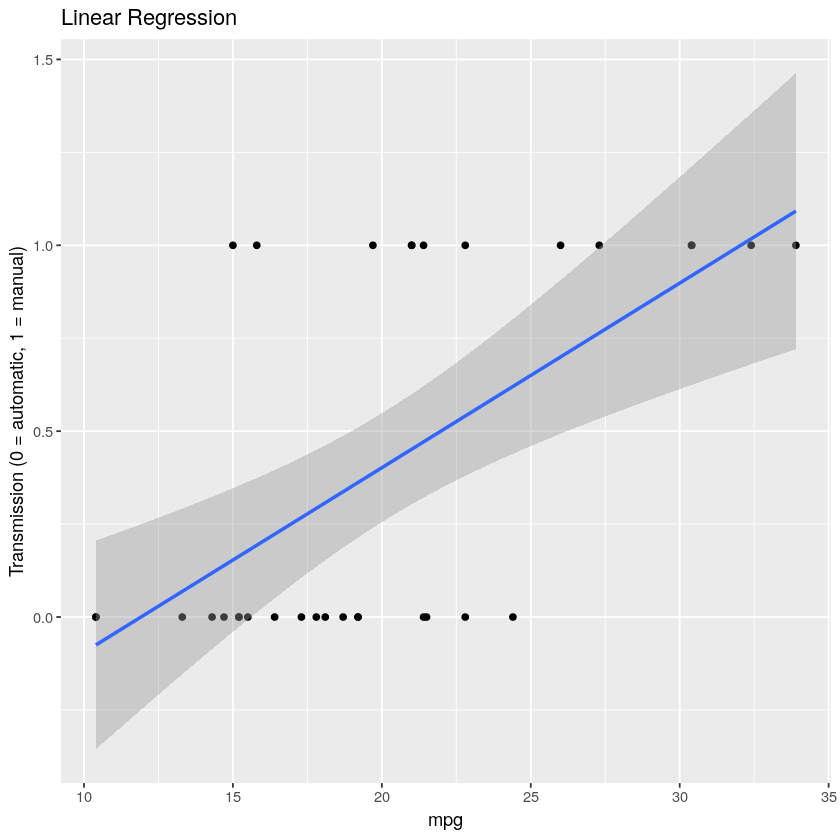

In [17]:
mtcars %>%
     ggplot(aes(x = mpg, y = am)) +
     geom_point() +
     geom_smooth(method = "lm") +
     labs(
         title = "Linear Regression", 
         x = "mpg",
         y = "Transmission (0 = automatic, 1 = manual)"
     )

# Nothing new here except changing the input data frame and the x and y values

A better model is </b>logistic regression</b>.  Logistic regression falls under the umbrella of the generalized linear model but differs in two regards:

- The distribution is binomial instead of normal
- The link function is the logit function instead of the identity function

The <b>logit function</b> (or <b>logistic function</b>) is a sigmoidal curve calculated as follows:

$$p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$

where

$p(x)$ = Probability of success based on the <b>log odds</b> (i.e. $ln\frac{\text{the probability of success}}{\text{probability of failure}}$).

$\beta_0$ = The intercept, representing the log odds when x=0

$\beta_1$ = Coefficient describing how the probability changes for each unit increase in x

If we now model our data using the logit function we get:

`geom_smooth()` using formula = 'y ~ x'


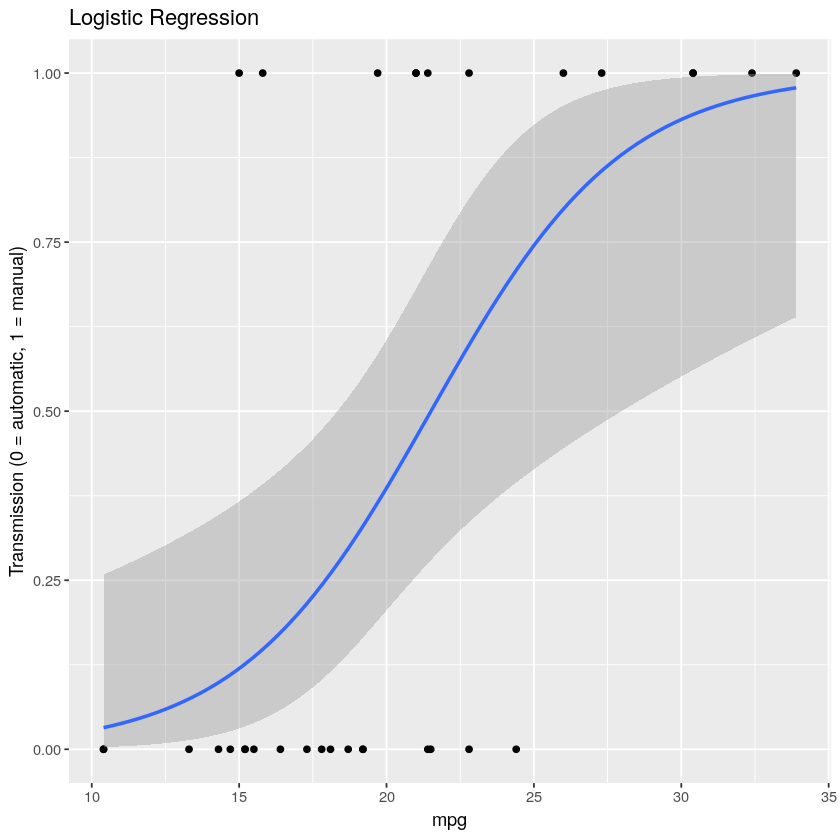

In [18]:
mtcars %>%
     ggplot(aes(x = mpg, y = am)) +
     geom_point() +
     geom_smooth(method = "glm", method.args = list(family = "binomial")) +
     labs(
         title = "Logistic Regression", 
         x = "mpg",
         y = "Transmission (0 = automatic, 1 = manual)"
     )

# To get the logistic curve, we change the geom_smooth method argument to "glm" and use the method.args argument to set the distribution to "binomial"
# y is our binomial variable of success or failure (e.g. 1 or 0).  In this case, "success" means manual transmission, "failure" means automatic transmission.

Before we perform a formal logistic regression, let's look at this plot.  For any given value of x, imagine a vertical line that divides the data into automatic (0) vs. manual (1).  At x=0, all data points are classified as manual.  At x = $\infty$, all data points are classified as automatic.  At any point in between, some proportion of the data points will be classified as manual and the rest as automatic.  The number of data points that are correctly classified (true positives and true negatives) or incorrectly classified (false positives and false negatives) will change based upon the value of x.  At some value of x, we maximize the number of true positives and minimize the number of false positives.  Alternatively, you can say that at a given probability of y, all data points that yield a probability > y will be considered a success (i.e. manual transmission).  We can see from our graph that the inflection point p = 0.5 corresponds to an fuel efficiency of ~21-22 mpg.

Let's now run the logistic regression in R using the <b>glm</b> function.

In [19]:
mtcars_logit <- glm(am ~ mpg, data = mtcars, family = "binomial")
summary(mtcars_logit)
exp(coef(mtcars_logit))

# We use the glm package to perform logistic regression using a formula y ~ x and setting the distribution to "binomial"
# coef extracts the coefficients from the regression model and exp exponentiates (i.e. e^x) the value to give us the odds ratio


Call:
glm(formula = am ~ mpg, family = "binomial", data = mtcars)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5701  -0.7531  -0.4245   0.5866   2.0617  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -6.6035     2.3514  -2.808  0.00498 **
mpg           0.3070     0.1148   2.673  0.00751 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.230  on 31  degrees of freedom
Residual deviance: 29.675  on 30  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 5


(Intercept)         mpg 
0.001355579 1.359379288

In linear regression, the coefficient represents a linear increase in _y_ for a 1 unit increase in _x_.  For logistic regression, the coefficient represents an increase in the log odds for a 1 unit increase in _x_.  So a 1 mpg increase in fuel efficiency represents a 0.3 increase in the log odds that the car in question has a manual transmission.  In other words, increasing the fuel efficiency by 1 mpg increases the odds that the car has a manual transmission by 1.35.

How do we evaluate the quality of the logistic regression?  Remember that at different points on the graph, some proportion of the points will be correctly classified and the rest will not.  We can break these values down into true positives (correctly classified as manual), true negatives (correctly classified as automatic), false positives (incorrectly classified as manual) and false negatives (incorrectly classified as automatic).  We can further define the concepts of <b>specificity</b> and <b>sensitivity</b>.

$$\text{sensitivity} = \text{true positive rate} = \frac{\text{true positives}}{\text{total positives}}$$

$$\text{specificity} = \text{true negative rate} = \frac{\text{true negatives}}{\text{total negatives}}$$

$$\text{false positive rate} = 1 - \text{specificity}$$

With this data we can plot a <b>receiver operating characteristic</b> curve to see the trade-off between the true positive and false positive rates in our model.

In [20]:
roc(am ~ mpg, mtcars)

# The pROC package is used to generate ROC curves, in this case based on a logistic model
# The roc function in its most basic form returns some basic information including the area under the curve (AUC)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = am ~ mpg, data = mtcars)

Data: mpg in 19 controls (am 0) < 13 cases (am 1).
Area under the curve: 0.83

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = mtcars$am, predictor = mtcars$mpg, percent = FALSE,     ci = TRUE, plot = TRUE, boot.n = 100, ci.alpha = 0.9, stratified = FALSE,     auc.polygon = TRUE, max.auc.polygon = TRUE, grid = TRUE,     print.auc = TRUE, show.thres = TRUE)

Data: mtcars$mpg in 19 controls (mtcars$am 0) < 13 cases (mtcars$am 1).
Area under the curve: 0.83
95% CI: 0.6783-0.9816 (DeLong)

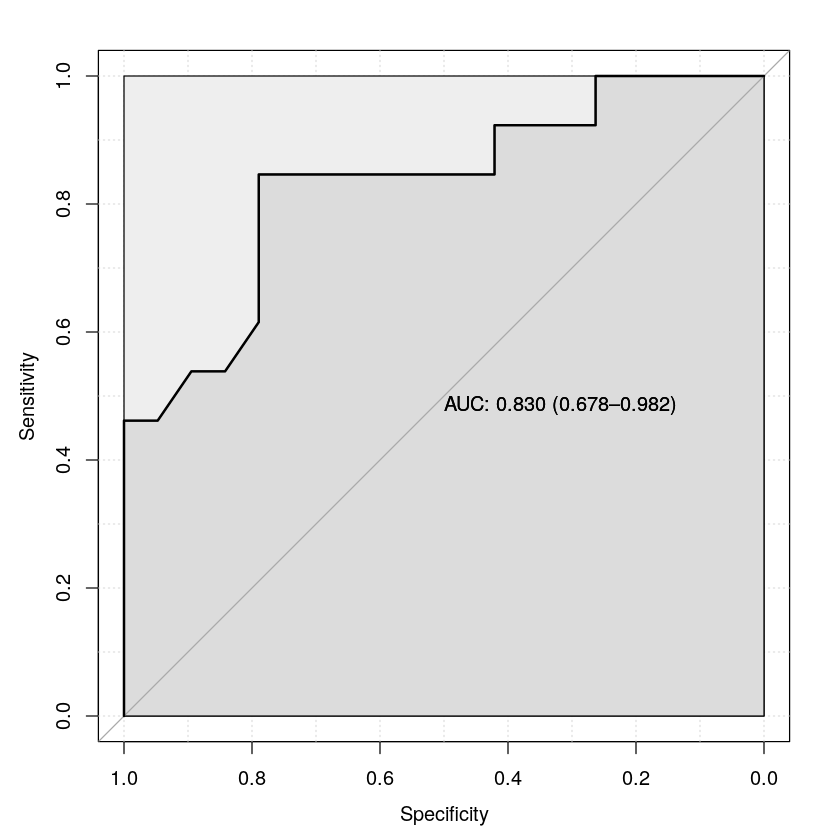

In [21]:
roc(mtcars$am, mtcars$mpg, percent=FALSE,
    ci=TRUE, boot.n=100, ci.alpha=0.9, stratified=FALSE,
    plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
    print.auc=TRUE, show.thres=TRUE)

# We can also use roc to plot the curve
# The first line of arguments indicate the response (am) and predictor (mpg) variables and indicates the values should not be plotted as percentages
# The second line calculates confidence intervals and sets the arguments for that calculation
# The remaining lines indicates the curve should be plotted and sets graphical parameters and prints the AUC value on the plot

What does this curve mean?  If we start at sensitivity = 0, all values are classified as manual transmission, so the false positive value is maximum.  As sensitivity increase, manual transmission cars are increasingly classified correctly.  However, at the inflection point of the graph, we begin to see a drastic increase in the number of manual transmission cars incorrectly classified as automatic.

<div class="alert alert-block alert-info">
    <b>&#9995; Tip:</b> The R package <b>pROC</b> that we used to generate the curve directly plots sensitivity vs. specificity, which is why the x axis goes from 100 to 0.  You will also see ROC curves plotted as sensitivity vs. 1 - specificity which gives a more traditional 0 to 100 x axis.</div>

<b>AUC</b> is the <b>Area Under the Curve</b> and is the number we usually look at to evaluate the curve and represents the probability that a point will be correctly classified.  At AUC = 0.5, there is no distinction between the data points (i.e. they can't be classified) and AUC = 1 indicates perfect classification of the data.  AUC = 0.830 isn't bad but indicates the model could probably be improved.

---

## Overview

The material included in this submodule is only a fraction of the concepts covered by linear algebra.  We have included useful references below for those who wish to explore the topics in more detail.  Specific topics we recommend to users:

### Experimental Design

We often think of the scientific method as a circular process involving generating a hypothesis, designing experiments, running experiments, analyzing results, and testing the hypothesis.  In practice, experimental design and data analysis are intimately linked.  When designing your experiments, you are in essence having a conversation with your future self on how best to design the experiment to get the data you will need.  Factors to consider include:

- What analytical methods will you need to use?
- What covariates will you include in my model?  Do you expect interaction effects?
- What confounding variables could affect your results?  Will you account for them in the design stage or in the analysis stage?
- What controls will you need to account for background noise or to make appropriate comparisons?
- How many replicates will you need?  What significance or effect size do you expect?  Have you performed a power analysis?

No amount of data analysis will compensate for bad experimental design, so taking time at the beginning to carefully plan your experiments will save you a lot of time and effort during the data analysis step.

### Advanced Models

We covered simple linear and logistic regression models with a single independent variable and multiple regression models with a single covariate with multiple levels or with multiple covariates.  The more covariates you add to your model, the more complicated interpretation of the model becomes.  The type of covariate you introduce will also affect the analysis method you choose and the interpretation of the data.  Some such models are:

- __Multi-factorial Models__ - When working with multiple covariates each with multiple levels, factorial designs that compare all combinations of the factors are common.  Factorial designs are closely related to multiple regression and are very useful in analyzing interaction effects, that is, effects that are introduced when covariates are not fully independent of each other (e.g. height and weight).
- __Repeated-Measures (Longitudinal) Models__ - Often we want to take measurements from the same sample at multiple time points to determine the change in the measurement over time (as opposed to cross-sectional studies that collect measurements at a single time point).  Longitudinal studies can be used to study cohorts of similar individuals, to study effects in a single individual, or to study short-term vs. long-term effects.  Repeated-measures affects are common in ANOVA but care must be taken to account for inflated false positive rates.
- __Multivariate Models__ - Sometimes we deal with systems with multiple dependent variables.  This situation is common with high-dimensional data sets such as we encounter with omics data sets.  Most of the methods we've discussed in this submodule have multivariate methods (e.g. multivariate linear/logistic regression, MANOVA, MANCOVA, etc.).  Other multivariate methods such as principle components analysis (PCA) will be discussed in <b>Submodule 8: Introduction to Exploratory Analysis</b>.
- __Linear Mixed Models__ - A variation of linear models, LMM's treat covariates as fixed or random variables.  A fixed variable is what we usually think of when talking about covarites (i.e. something we measure), while a random variable represents random properties of a population (i.e. an effect of a group of mice living in the same cage).  LMM's are very useful for dealing with batch effects and other confounding variables.
- __Non-Linear Models__ - Not every set of variables show linear relationships.  For example, population growth tends to follow a logistic pattern.  Non-linear models are useful for dealing with these situations.

---

## Conclusions

Aside from basic statistics, linear algebra may be the the most useful topic bioinformatians and data sciences can learn.  Linear models are fundamental to many processes in math and statistics and a deeper understanding of how models work will aid you at every step of the scientific method.  In particular, linear models are fundamental to:

- Many downstream omics data analyses such as differential analysis, pathway/gene set enrichment analysis, and exploratory analysis.
- Exploratory analysis methods such as principle components analysis
- Many types of machine learning algorithms including regression models and neural networks.

An understanding of linear models also provides a foundation for understanding non-linear models which are used in methods such as t-SNE.  We encourage you to explore these topics in more detail on your own.

---

<p><span style="font-size: 30px"><b>Quizzes</b></span> <span style="float : inline;">(run the command below to display the quizzes)</span> </p>

In [22]:
IRdisplay::display_html('<iframe src="quizes/Chapter3_Quizes.html" width=100% height=450></iframe>')

---

## References

### Core Reading
[Boyd S, Vandenberghe L: Introduction to Applied Linear Algebra (Vectors, Matrices, and Least Squares). 2018, Cambridge University Press][boyd]<br>
[Dunn PK, Smyth GK: Generalized Linear Models With Examples in R.  2018, Springer Science+Business Media, LLC][dunn]<br>


### Further Reading
[Zelterman D: Applied Multivariate Statistics with R.  2015, Springer International Publishing AG Switzerland][zelterman]<br>
[Dean A, Voss D, Draguljic D: Design and Analysis of Experiments.  2017, Springer International Publishing AG Switzerland][dean]<br>
[Heiberger RM, Holland B: Statistical Analysis and Data Display (An Imtermediate Course with Examples in R).  2015, Springer Science+Business Media, LLC][Heiberger]<br>

[boyd]: https://www.cambridge.org/highereducation/books/introduction-to-applied-linear-algebra/4D69AF22E38303FE20FFEEFDCE0E7F96#overview "Boyd S, Vandenberghe L.: Introduction to Applied Linear Algebra (Vectors, Matrices, and Least Squares). 2018, Cambridge University Press"
[dunn]: https://link.springer.com/book/10.1007/978-1-4419-0118-7 "Generalized Linear Models With Examples in R.  2018, Springer Science+Business Media, LLC"
[zelterman]: https://link.springer.com/book/10.1007/978-3-319-14093-3 "Zelterman D: Applied Multivariate Statistics with R.  2015, Springer International Publishing AG Switzerland"
[dean]: https://link.springer.com/book/10.1007/978-3-319-52250-0 "Dean A, Voss D, Draguljic D: Design and Analysis of Experiments.  2017, Springer International Publishing AG Switzerland"
[heiberger]: https://link.springer.com/book/10.1007/978-1-4939-2122-5 "Heiberger RM, Holland B: Statistical Analysis and Data Display (An Imtermediate Course with Examples in R).  2015, Springer Science+Business Media, LLC"

---

In [23]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 10 (buster)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.3.5.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] matlib_0.9.6    pROC_1.18.0     glm2_1.2.1      lubridate_1.9.2
 [5] forcats_1.0.0   stringr_1.5.0   dplyr_1.1.1     purrr_1.0.1    
 [9] readr_2.1.4     tidyr_1.3.0     tibble_3.2.1    ggplot2_3.4.1  
[13] tidyverse_2.0.0

loaded via a namespace (and not attached):
 [1] rgl_1.1.3         Rcpp_1.0.10       lattic